# Physical Model

We will set $\hbar=1$ for convenience. Also we will follow from here the notation from Python for matrices and arrays such that the first qubit will be labelled with 0 and so on. For a homogeneous interaction, set $A_{ij}=\frac{J}{N}=A$ for i<j, then we have under the cumulant approximation:

\begin{align}
\partial_{t}\!\left\langle \hat{\sigma}_{0}^{+}\right\rangle  & =\frac{2{\rm i}A}{\hbar}\left(N-1\right)\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{z}\right\rangle -\left(\gamma_{+}+\gamma_{-}+4\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{z}\right\rangle  & =2\left(\gamma_{+}-\gamma_{-}\right)-2\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{+}\right\rangle  & \approx\frac{4{\rm i}A}{\hbar}\left(N-2\right)\left(\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{+}\right\rangle \left\langle \hat{\sigma}_{0}^{z}\right\rangle +2\left(\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{z}\right\rangle -\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)-2\left(\gamma_{+}+\gamma_{-}+4\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{+}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{-}\right\rangle  & =-2\left(\gamma_{+}+\gamma_{-}+4\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{+}\hat{\sigma}_{1}^{-}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{+}\right\rangle  & \approx\frac{2{\rm i}A}{\hbar}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle +\left(N-2\right)\left(\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{z}\right\rangle \left\langle \hat{\sigma}_{0}^{+}\right\rangle +2\left(\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{+}\right\rangle -\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\right)+2\left(\gamma_{+}-\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \\
 & \,\,\,\,\,-\left(3\left(\gamma_{+}+\gamma_{-}\right)+4\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{+}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{z}\right\rangle  & =-4\left(\gamma_{-}-\gamma_{+}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle -4\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{z}\hat{\sigma}_{1}^{z}\right\rangle .
\end{align}


# Complex ODEINT function

In [26]:
import time
import numpy as np
from scipy.integrate import odeint


def odeintz(func, z0, t, **kwargs):
    """An odeint-like function for complex valued differential equations."""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z
    
    
def tin(a):
            if a=="xx":
                return 0
            elif a=="xy":
                return 1
            elif a=="xz" :
                return 2
            elif a=="yx":
                return 3
            elif a=="yy":
                return 4
            elif a=="yz":
                return 5
            elif a=="zx":
                return 6
            elif a=="zy":
                return 7
            elif a=="zz":
                return 8

# Simulation

## Parameters

In [46]:
"""The user needs to set 2 parameters and the initial conditions of the system."""
"""In our case the parameters are the matrix h and the interaction matrix A."""
"""If the user do not set them then they will be set as 0 by default"""


#h=[[0,0,0],
#   [0,0,0]]

#h=[[1, 2, 1],
#   [-2,4,1]]



h=[[0,0,0],
   [0,0,0]]

h=np.array(h)

"""The tensor A can be visualized as an array of matrices, regarding Axx, Axy, Axz, ...,Azx, Azy, Azz."""
""" They should be set by the user, by default if the user do not set them then we will solve the Ising model"""
"""for which Azz\neq0 and the other matrices are zero. This is a benchmark so we consider N=2, then all the matrices"""
"""will have dimension 2x2"""



"""Introduce physical matrices for the multiarray A, not all matrices will lead to physical states."""
"""See the detailed document at Github to learn more about the type of matrices accepted"""




Axx=[[ 0.1, 0.08],
     [ 0.08, 0.1]]

Axy=[[ 0.2, 0],
     [ 0, -0.1]]

Axz=[[ 0.1, -0.08],
     [ -0.08, 0.1]]


Ayx=[[ 0.2, 0.03],
     [ 0.03, -0.1]]

Ayy=[[ 0.1, -0.08],
     [ -0.08, 0.1]]

Ayz=[[ 0.0, 0.02],
     [ 0.02, 0.0]]

Azx=[[ 0.0, 0.01],
     [ 0.01, 0.0]]

Azy=[[ 0, 0.09],
     [ 0.09, 0]]


J=10
N=2

Azz=[[ 0, J/N],
     [ 0, 0]]  #Ising model matrix!!!

#### We need to inclue a hermiticity test for the multiarray A!!!!


A=np.array([np.array(Axx),np.array(Axy),np.array(Axz),
           np.array(Ayx),np.array(Ayy),np.array(Ayz),
           np.array(Azx),np.array(Azy),np.array(Azz)])


A_null=np.array([[0,0],[0,0]])
A=np.array([A_null,A_null,A_null,A_null,A_null,A_null,A_null,A_null,np.array(Azz)])


"""As well the user will set the dissipation parameters given by gamma+, gamma- and gammaz"""
"""A dissipation factor is considered to increase/decrease proportionally the dissipation vector"""


#Azz=[[ 1, -2],     [ 2, 1]]   #Ising model matrix!!!

#A=np.array(Azz)




Dissipation_factor=1#0.5


Gamma_ud=0.3
Gamma_du=0.2
Gamma_el=1.6


gammaplus=Gamma_du/2
gammaminus=Gamma_ud/2
gammaz=Gamma_el/8


Gamma=np.array([gammaplus,gammaminus,gammaz])  #[gamma+,gamma-,gammaz]


### Initial State

"""We consider by defect that the system starts in |0> for all the spins. The user can set the initial state as well."""
"""Recall that |0><0|=[[1,0],[0,0]]  """

"""The benchmark suggests that our initial state should be |psi(0)>=|+>"""


#t0=time.time()



def trace(A):
    return np.trace(A)

def matmu(A,B):
    return np.matmul(A,B)


rho_init0=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|
rho_init1=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|



#rho_init1=np.array([[1,0],[0,0]])    #By default
#rho_init2=np.array([[1,0],[0,0]])    #By default


sigma_p= np.array([[0,1],[0,0]])
sigma_m= np.array([[0,0],[1,0]])
sigma_z= np.array([[1,0],[0,-1]])


##Initial values one operator

sp_init0=trace(matmu(rho_init0,sigma_p))
sz_init0=trace(matmu(rho_init0,sigma_z))
sp_init1=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sm_init1=trace(matmu(rho_init1,sigma_m))


##Initial values two-operators
## We assume initial separability of the state
#p0, z0, p1, z1 , p0p1, p0m1, z0p1, p0z1, z0z1 = z


sp_initp0p1=sp_init0*sp_init1
sz_initp0m1=sp_init0*sm_init1
sp_initz0p1=sz_init0*sp_init1
sz_initp0z1=sp_init0*sz_init1
sz_initz0z1=sz_init0*sz_init1




z0=np.array([sp_init0,sz_init0,sp_initp0p1,sz_initp0m1,sp_initz0p1,sz_initz0z1])


init_time=0
final_time=5
steps=300


#t1=time.time()

#print(t1-t0)

#t0=time.time()

def cj(z): 
    return z.conjugate()

def real(z): 
    return z.real

def imag(z): 
    return z.imag


def dot_p(v1,v2):
    return np.dot(v1,v2)


if __name__ == "__main__":

    # Define the right-hand-side of the differential equation.
    def zfunc(z, t):
        p0, z0, p0p1, p0m1,   z0p1, z0z1 = z
        
        
        def tin(a):
            if a=="xx":
                return 0
            elif a=="xy":
                return 1
            elif a=="xz" :
                return 2
            elif a=="yx":
                return 3
            elif a=="yy":
                return 4
            elif a=="yz":
                return 5
            elif a=="zx":
                return 6
            elif a=="zy":
                return 7
            elif a=="zz":
                return 8
        
     
    
        
        dp0dt=2*1j*A[tin("zz")][0][1]*(N-1)*z0p1    -(Gamma[0]+Gamma[1]+4*Gamma[2])*p0
        
        dz0dt= 2*(Gamma[0]-Gamma[1])-2*(Gamma[0]+Gamma[1])*z0  
        
        dp0p1dt=4*1j*A[tin("zz")][0][1]*(N-2)*(p0p1*z0+2*(z0p1-p0*z0)*p0)    -2*(Gamma[0]+Gamma[1]+4*Gamma[2])*p0p1

        dp0m1dt=-2*(Gamma[0]+Gamma[1]+4*Gamma[2])*p0m1

        dz0p1dt=2*1j*A[tin("zz")][0][1]*( p0 + (N-2)*(z0z1*p0+2*(z0p1-z0*p0)*z0) )+2*(Gamma[0]-Gamma[1])*p0   
        dz0p1dt=dz0p1dt -(3*(Gamma[0]+Gamma[1])+4*Gamma[2])*z0p1
            
        dz0z1dt=      - 4*(Gamma[1]-Gamma[0])*z0-4*(Gamma[0]+Gamma[1])*z0z1
        
        
        
        
        return [dp0dt, dz0dt, dp0p1dt, dp0m1dt, dz0p1dt, dz0z1dt] 

    # Set up the inputs and call odeintz to solve the system.
    t = np.linspace(init_time, final_time, steps)
    z, infodict = odeintz(zfunc, z0, t, full_output=1)
    
#t1=time.time()
#print(t1-t0)

## Comparing Ising decay results from Foss et al. and Generic Approach

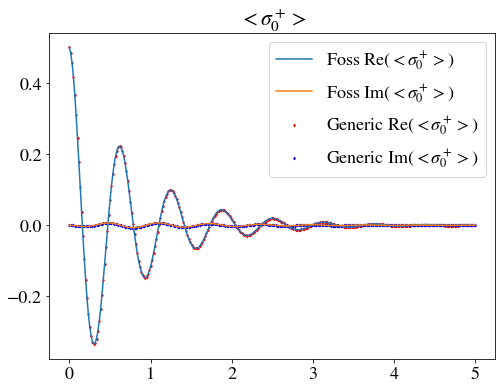

In [47]:
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el

lamda=Gamma_r/2

J01=N*A[tin("zz")][0][1]


s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def p0_gen(t):
    return  0.5*np.exp(-Tot*t/2)*( np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5)) )**(N-1)

import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+>$')
plt.plot(t,np.real(p0_gen(t)),label="Foss Re($<\sigma_0^+>$)")
plt.scatter(t,np.real(z[:,0]),label="Generic Re($<\sigma_0^+>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0_gen(t)),label="Foss Im($<\sigma_0^+>$)")
plt.scatter(t,np.imag(z[:,0]),label="Generic Im($<\sigma_0^+>$)",color='b',marker='d',s=3)
plt.legend()
plt.show()

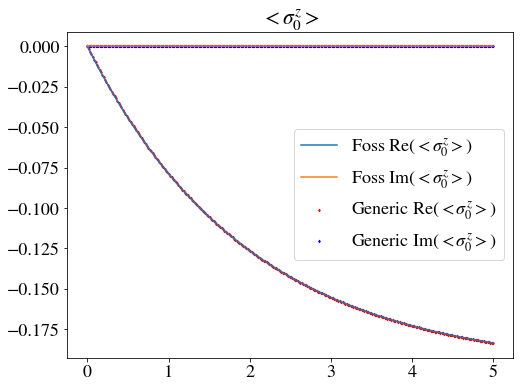

In [48]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

J01=N*A[tin("zz")][0][1]

s=2*1j*gamma+2*J/N
r=Gamma_ud*Gamma_du

def z0_gen(t):
    return 2*(-Gamma_ud+Gamma_du)/(Gamma_ud+Gamma_du)*np.exp(-Gamma_r*t/2)*np.sinh(Gamma_r*t/2) 


import matplotlib.pyplot as plt

plt.title('$<\sigma_0^z>$')
plt.plot(t,np.real(z0_gen(t)),label="Foss Re($<\sigma_0^z>$)")
plt.scatter(t,np.real(z[:,1]),label="Generic Re($<\sigma_0^z>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(z0_gen(t)),label="Foss Im($<\sigma_0^z>$)")
plt.scatter(t,np.imag(z[:,1]),label="Generic Im($<\sigma_0^z>$)",color='b',marker='d',s=3)
plt.legend()
plt.show()

In [49]:
# [dp0dt, dz0dt, dp0p1dt, dp0m1dt, dp0z1dt, dz0z1dt]

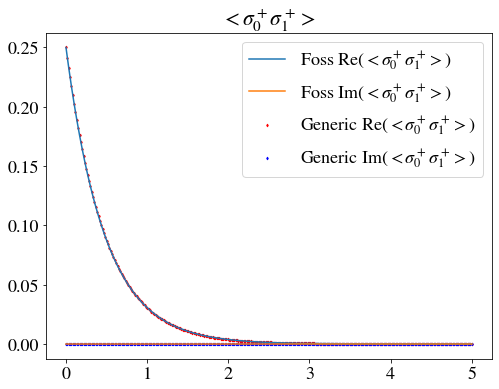

In [50]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

J01=2*N*A[tin("zz")][0][1]


s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def p0_gen(t):
    return  0.25*np.exp(-2*Tot*t/2)*( np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5)) )**(N-2)


import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+\sigma_1^+>$')
plt.plot(t,np.real(p0_gen(t)),label="Foss Re($<\sigma_0^+\sigma_1^+>$)")
plt.scatter(t,np.real(z[:,2]),label="Generic Re($<\sigma_0^+\sigma_1^+>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0_gen(t)),label="Foss Im($<\sigma_0^+\sigma_1^+>$)")
plt.scatter(t,np.imag(z[:,2]),label="Generic Im($<\sigma_0^+\sigma_1^+>$)",color='b',marker='d',s=3)
#plt.plot(t,np.real(g[:,0]**2),label="Mean-Field Re($<\sigma_0^+\sigma_1^+>$)")
#plt.plot(t,np.imag(g[:,0]**2),label="Mean-Field Im($<\sigma_0^+\sigma_1^+>$)")
plt.legend()
plt.show()

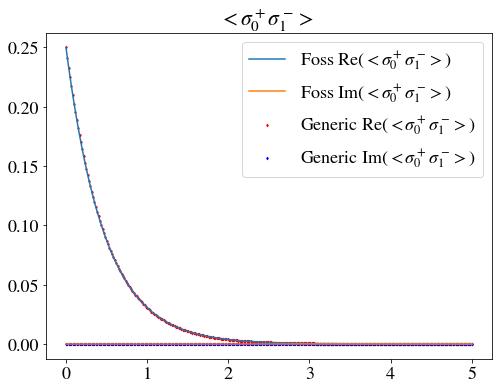

In [51]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

J01=N*A[tin("zz")][0][1]


s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def p0_gen(t):
    return  0.25*np.exp(-2*Tot*t/2)

import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+\sigma_1^->$ ')
plt.plot(t,np.real(p0_gen(t)),label="Foss Re($<\sigma_0^+\sigma_1^->$)")
plt.scatter(t,np.real(z[:,3]),label="Generic Re($<\sigma_0^+\sigma_1^->$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0_gen(t)),label="Foss Im($<\sigma_0^+\sigma_1^->$)")
plt.scatter(t,np.imag(z[:,3]),label="Generic Im($<\sigma_0^+\sigma_1^->$)",color='b',marker='d',s=3)
plt.legend()
plt.show()


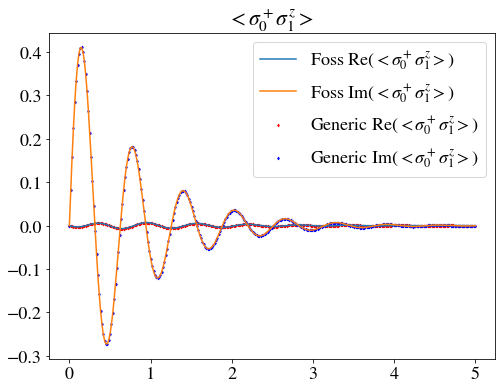

In [52]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

r=Gamma_ud*Gamma_du

J01=N*A[tin("zz")][0][1]

s=2*1j*gamma+2*J01/N


def p0z1_gen(t):
    return  0.5*np.exp(-Tot*t/2) * ( np.exp(-lamda*t)*(1j*s-2*gamma)*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5))*((np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5)) )**(N-2))
 
import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+\sigma_1^z>$ ')
plt.plot(t,np.real(p0z1_gen(t)),label="Foss Re($<\sigma_0^+\sigma_1^z>$)")
plt.scatter(t,np.real(z[:,4]),label="Generic Re($<\sigma_0^+\sigma_1^z>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0z1_gen(t)),label="Foss Im($<\sigma_0^+\sigma_1^z>$)")
plt.scatter(t,np.imag(z[:,4]),label="Generic Im($<\sigma_0^+\sigma_1^z>$)",color='b',marker='d',s=3)
plt.legend()
plt.show()


# [dp0dt, dz0dt, dp0p1dt, dp0m1dt, dz0p1dt, dz0z1dt]

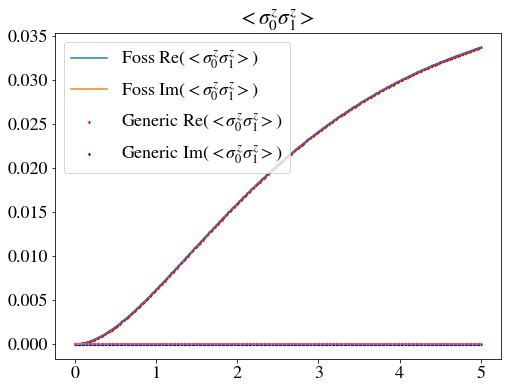

In [53]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

J01=2*N*A[tin("zz")][0][1]

s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def z0_gen(t):
    return (2*(-Gamma_ud+Gamma_du)/(Gamma_ud+Gamma_du)*np.exp(-Gamma_r*t/2)*np.sinh(Gamma_r*t/2))**2 


import matplotlib.pyplot as plt

plt.title('$<\sigma_0^z\sigma_1^z>$ ')
plt.plot(t,np.real(z0_gen(t)),label="Foss Re($<\sigma_0^z\sigma_1^z>$)")
plt.scatter(t,np.real(z[:,5]),label="Generic Re($<\sigma_0^z\sigma_1^z>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(z0_gen(t)),label="Foss Im($<\sigma_0^z\sigma_1^z>$)")
plt.scatter(t,np.imag(z[:,5]),label="Generic Im($<\sigma_0^z\sigma_1^z>$)",color='b',marker='d',s=3)
plt.legend()
plt.show()


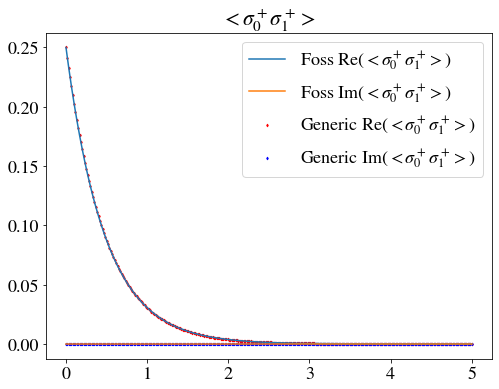

In [54]:
import numpy as np

Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el
N=2
lamda=Gamma_r/2

J01=2*N*A[tin("zz")][0][1]


s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def p0_gen(t):
    return  0.25*np.exp(-2*Tot*t/2)*( np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5)) )**(N-2)


import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+\sigma_1^+>$')
plt.plot(t,np.real(p0_gen(t)),label="Foss Re($<\sigma_0^+\sigma_1^+>$)")
plt.scatter(t,np.real(z[:,2]),label="Generic Re($<\sigma_0^+\sigma_1^+>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0_gen(t)),label="Foss Im($<\sigma_0^+\sigma_1^+>$)")
plt.scatter(t,np.imag(z[:,2]),label="Generic Im($<\sigma_0^+\sigma_1^+>$)",color='b',marker='d',s=3)



plt.legend()
plt.show()

We define the collective spin as $\hat{J}_{\alpha}=\frac{1}{2}\left(\sum \hat{\sigma}_{\alpha}^x,\sum\hat{\sigma}_{\alpha}^y,\sum\hat{\sigma}_{\alpha}^z  \right)$, we can prove that for N=2 

In [48]:
J_expected=[]

for j in range(len(z[:,7])):
    J_expected.append([0.5*(real(z[:,0][j])+real(z[:,2][j]))  , 0.5*(imag(z[:,0][j])+imag(z[:,2][j]))  ,  0.5*(real(z[:,1][j])+real(z[:,3][j]))  ])
    


def norm(A):
    return ((A[0])**2+(A[1])**2+(A[2])**2)**0.5

J_expected_norm=[]
for j in J_expected:
    J_expected_norm.append(norm(j))

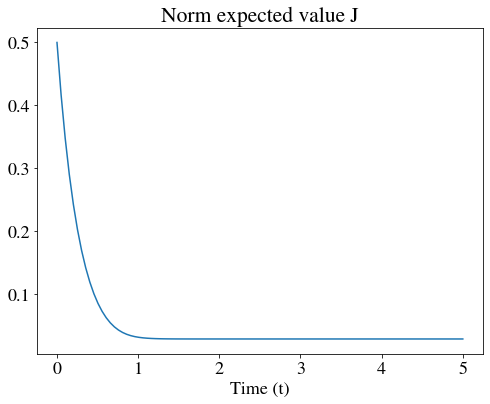

In [49]:
plt.plot(t,J_expected_norm)
plt.title("Norm expected value J")
plt.xlabel("Time (t)");

In [16]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [500]:
"""The user needs to set 2 parameters and the initial conditions of the system."""
"""In our case the parameters are the matrix h and the interaction matrix A."""
"""If the user do not set them then they will be set as 0 by default"""


#h=[[0,0,0],
#   [0,0,0]]

#h=[[1, 2, 1],
#   [-2,4,1]]



h=[[0,0,0],
   [0,0,0]]

h=np.array(h)

"""The tensor A can be visualized as an array of matrices, regarding Axx, Axy, Axz, ...,Azx, Azy, Azz."""
""" They should be set by the user, by default if the user do not set them then we will solve the Ising model"""
"""for which Azz\neq0 and the other matrices are zero. This is a benchmark so we consider N=2, then all the matrices"""
"""will have dimension 2x2"""



"""Introduce physical matrices for the multiarray A, not all matrices will lead to physical states."""
"""See the detailed document at Github to learn more about the type of matrices accepted"""




Axx=[[ 0.1, 0.08],
     [ 0.08, 0.1]]

Axy=[[ 0.2, 0],
     [ 0, -0.1]]

Axz=[[ 0.1, -0.08],
     [ -0.08, 0.1]]


Ayx=[[ 0.2, 0.03],
     [ 0.03, -0.1]]

Ayy=[[ 0.1, -0.08],
     [ -0.08, 0.1]]

Ayz=[[ 0.0, 0.02],
     [ 0.02, 0.0]]

Azx=[[ 0.0, 0.01],
     [ 0.01, 0.0]]

Azy=[[ 0, 0.09],
     [ 0.09, 0]]


J=100
N=2000

Azz=[[ 0, J/N],
     [ 0, 0]]  #Ising model matrix!!!

#### We need to inclue a hermiticity test for the multiarray A!!!!


A=np.array([np.array(Axx),np.array(Axy),np.array(Axz),
           np.array(Ayx),np.array(Ayy),np.array(Ayz),
           np.array(Azx),np.array(Azy),np.array(Azz)])


A_null=np.array([[0,0],[0,0]])
A=np.array([A_null,A_null,A_null,A_null,A_null,A_null,A_null,A_null,np.array(Azz)])


"""As well the user will set the dissipation parameters given by gamma+, gamma- and gammaz"""
"""A dissipation factor is considered to increase/decrease proportionally the dissipation vector"""


#Azz=[[ 1, -2],     [ 2, 1]]   #Ising model matrix!!!

#A=np.array(Azz)




Dissipation_factor=1#0.5


Gamma_ud=0.3
Gamma_du=0.2
Gamma_el=1.6


gammaplus=Gamma_du/2
gammaminus=Gamma_ud/2
gammaz=Gamma_el/8


Gamma=np.array([gammaplus,gammaminus,gammaz])  #[gamma+,gamma-,gammaz]


### Initial State

"""We consider by defect that the system starts in |0> for all the spins. The user can set the initial state as well."""
"""Recall that |0><0|=[[1,0],[0,0]]  """

"""The benchmark suggests that our initial state should be |psi(0)>=|+>"""


#t0=time.time()



def trace(A):
    return np.trace(A)

def matmu(A,B):
    return np.matmul(A,B)


rho_init0=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|
rho_init1=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|



#rho_init1=np.array([[1,0],[0,0]])    #By default
#rho_init2=np.array([[1,0],[0,0]])    #By default


sigma_p= np.array([[0,1],[0,0]])
sigma_m= np.array([[0,0],[1,0]])
sigma_z= np.array([[1,0],[0,-1]])


##Initial values one operator

sp_init0=trace(matmu(rho_init0,sigma_p))
sz_init0=trace(matmu(rho_init0,sigma_z))
sp_init1=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sm_init1=trace(matmu(rho_init1,sigma_m))


##Initial values two-operators
## We assume initial separability of the state
#p0, z0, p1, z1 , p0p1, p0m1, z0p1, p0z1, z0z1 = z


sp_initp0p1=sp_init0*sp_init1
sz_initp0m1=sp_init0*sm_init1
sp_initz0p1=sz_init0*sp_init1
sz_initp0z1=sp_init0*sz_init1
sz_initz0z1=sz_init0*sz_init1




z0=np.array([sp_init0,sz_init0])


init_time=0
final_time=5
steps=300


#t1=time.time()

#print(t1-t0)

#t0=time.time()

def cj(z): 
    return z.conjugate()

def real(z): 
    return z.real

def imag(z): 
    return z.imag


def dot_p(v1,v2):
    return np.dot(v1,v2)


if __name__ == "__main__":

    # Define the right-hand-side of the differential equation.
    def zfunc(z, t):
        p0, z0 = z
        
        
        def tin(a):
            if a=="xx":
                return 0
            elif a=="xy":
                return 1
            elif a=="xz" :
                return 2
            elif a=="yx":
                return 3
            elif a=="yy":
                return 4
            elif a=="yz":
                return 5
            elif a=="zx":
                return 6
            elif a=="zy":
                return 7
            elif a=="zz":
                return 8
        
     
    
        
        dp0dt=2*1j*A[tin("zz")][0][1]*(N-1)*z0*p0    -(Gamma[0]+Gamma[1]+4*Gamma[2])*p0
        
        dz0dt= 2*(Gamma[0]-Gamma[1])-2*(Gamma[0]+Gamma[1])*z0        
        
        
        
        return [dp0dt, dz0dt] 

    # Set up the inputs and call odeintz to solve the system.
    t = np.linspace(init_time, final_time, steps)
    g, infodict = odeintz(zfunc, z0, t, full_output=1)
    
#t1=time.time()
#print(t1-t0)

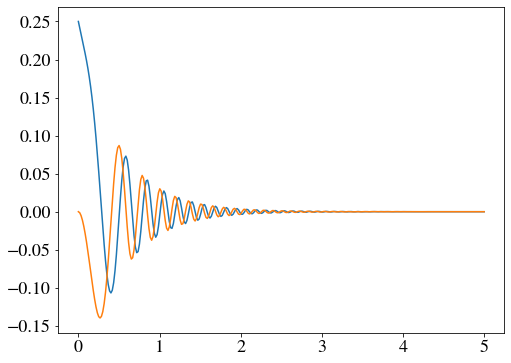

In [501]:
plt.plot(t,np.real(g[:,0]**2))
plt.plot(t,np.imag(g[:,0]**2))

In [495]:
trace(matmu(rho_init0,sigma_p))

0.5